#**Women's Clothing E-Commerce Reviews Prediction**

##**Objective**
The objective of this project is to build a model that can predict whether a review for women's clothing products is recommended or not based on the text content of the review.

##**Data Source**
The dataset used in this project is the Women's Clothing E-Commerce Reviews dataset obtained from Kaggle. The dataset contains customer reviews of women's clothing products, along with various attributes such as age, rating, review text, division name, department name, etc.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Import Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

##**Import Data** 

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Models/Womens Clothing E-Commerce Reviews.csv')

##**Describe Data**

In [42]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [44]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


##**Data Visualization**

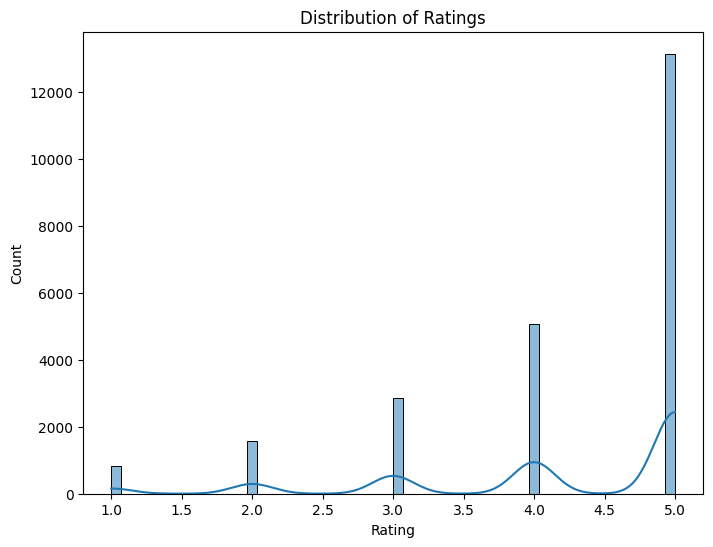

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rating', kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


##**Define Target Variable (y) and Feature Variables (X)**

In [46]:
X = df['Review Text'].fillna('')  
y = df['Recommended IND']


##**Train Test Split**

In [47]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)

In [48]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

##**Modeling**

In [49]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

##**Model Evaluation**

In [50]:
y_pred = model.predict(X_test_vec)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test, y_pred))



Accuracy: 0.8957002979991485
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       813
           1       0.94      0.94      0.94      3885

    accuracy                           0.90      4698
   macro avg       0.82      0.82      0.82      4698
weighted avg       0.90      0.90      0.90      4698



##**Prediction**

In [51]:
new_reviews = ["This dress is amazing!", "The quality is poor."]
new_reviews_vec = vectorizer.transform(new_reviews)
predictions = model.predict(new_reviews_vec)


verbal_predictions = ['Recommended' if pred == 1 else 'Not Recommended' for pred in predictions]


for review, prediction in zip(new_reviews, verbal_predictions):
    print("Review:", review)
    print("Prediction:", prediction)
    print()


Review: This dress is amazing!
Prediction: Recommended

Review: The quality is poor.
Prediction: Not Recommended



##**Explanation**


Import libraries: This step imports the necessary libraries such as pandas, numpy, matplotlib.pyplot, seaborn, sklearn.model_selection, sklearn.feature_extraction.text, sklearn.naive_bayes, and sklearn.metrics. These libraries are used for data manipulation, visualization, model training, and evaluation.

Import data: The dataset is read from the specified file path using the pd.read_csv() function from pandas and stored in the DataFrame named 'df'.

Describe data: The .head(), .info(), and .describe() methods are used to provide an overview of the dataset. .head() displays the first few rows of the DataFrame, .info() provides information about the columns and data types, and .describe() generates summary statistics of numerical columns.

Data Visualization: In this section, data visualization is performed using matplotlib.pyplot and seaborn libraries. The example provided shows the distribution of ratings in the dataset using a histogram.

Data Preprocessing: The 'Review Text' column is considered as the feature variable (X) and the 'Recommended IND' column as the target variable (y). Missing values in the 'Review Text' column are handled by replacing them with empty strings using the fillna() method.

Train Test Split: The data is split into training and testing sets using the train_test_split() function from sklearn.model_selection. The training set consists of 80% of the data, while the remaining 20% is allocated for testing.

Vectorize the text data: The CountVectorizer() class from sklearn.feature_extraction.text is used to convert the text data into numerical features. fit_transform() is applied on the training set (X_train) to fit the vectorizer and transform the text into a vector representation. transform() is then used on the testing set (X_test) to transform the text into vectors using the fitted vectorizer.

Modeling: A Multinomial Naive Bayes model is created using the MultinomialNB() class from sklearn.naive_bayes. The model is trained on the training data by calling the fit() method, passing in the vectorized training data (X_train_vec) and the target variable (y_train).

Model Evaluation: The trained model is evaluated using the testing data. The predict() method is applied on the vectorized testing data (X_test_vec) to generate predicted labels. The accuracy of the model is calculated using the accuracy_score() function from sklearn.metrics. Additionally, the classification_report() function is used to generate a comprehensive report that includes precision, recall, F1-score, and support for each class.

Prediction: Two new reviews ("This dress is amazing!" and "The quality is poor.") are provided as examples. The transform() method is applied on the new_reviews using the fitted vectorizer (vectorizer) to convert the text into vector form. The predict() method is then used to predict the labels (1 or 0) for the new reviews.

Verbal form of predictions: The numeric predictions are converted into verbal form using a list comprehension. If the prediction is 1, it is labeled as 'Recommended', and if the prediction is 0, it is labeled as 'Not Recommended'.

Print predictions: The new reviews along with their corresponding verbal predictions are printed to the console.

This code demonstrates the process of building a text classification model using Multinomial Naive Bayes and applying it to predict the recommendation status of new reviews based on the provided dataset.

